In [ ]:
#Install non-standard packages (assuming jupyter notebook)
!pip install shap
!pip install lime
!pip install eli5

     |████████████████████████████████| 358kB 8.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491627 sha256=352d7dd5dde96a0a320573297ea89007d96d7d417453d4da404bca58f789b7ce
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
     |████████████████████████████████| 276kB 8.3MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=6d4647480915c3f91bb636e8cb155106ae6cca455c2617599b927f055c13692b
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
     |████████████████████████████████| 112kB 8.4MB/s 


In [ ]:
# load the dataset 
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Pump Predictive Maintenance/Condition Hydraulic Pump/condition Hydraulic.xlsx')
data.head()

,Unnamed: 0,cycle_id,date,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable,rul,label1
0,0,1,2019-01-01 00:00:00,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,1,35.166667,0
1,1,2,2019-01-01 00:10:00,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,1,35.000000,0
2,2,3,2019-01-01 00:20:00,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,NaN,1.113217,59.543150,3,100,0,130,1,34.833333,0
3,3,4,2019-01-01 00:30:00,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,1,34.666667,0
4,4,5,2019-01-01 00:40:00,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,1,34.500000,0


In [ ]:
df = pd.DataFrame(data, columns=['date','PS1','PS3', 'PS4', 'PS5', 'FS1', 'FS2', 'TS1', 'P1', 'VS1', 'CE1', 'CP1', 'SE1', 'rul', 'label1'])

In [ ]:
df = df.fillna(method='ffill')

In [ ]:
df.sample(5)

,date,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,rul,label1
1687,2019-01-12 17:10:00,160.577728,1.918364,10.172641,9.940329,6.417842,10.199915,35.665000,2577.614033,0.546500,46.913250,2.159233,55.345433,0.000000,1
1878,2019-01-14 01:00:00,160.610177,1.938668,10.093895,9.863730,6.520082,10.177712,36.187783,2553.700133,0.539883,47.163433,2.165833,57.008067,0.000000,1
214,2019-01-02 11:40:00,167.473575,1.311191,0.000000,8.539199,4.294932,9.204912,54.124950,2570.476500,0.734700,20.090683,1.546683,38.755900,0.000000,1
753,2019-01-06 05:30:00,157.728892,1.765115,0.000000,8.888045,6.629450,9.482103,48.595900,2432.673467,0.595333,26.377233,1.783800,59.681750,31.666667,0
11,2019-01-01 01:50:00,159.235113,1.825662,0.000000,9.023034,6.663307,9.931453,44.638500,2472.273200,0.578150,18.068833,1.164583,59.758183,33.333333,0


In [ ]:
X = df.iloc[:, 1:13]
y = df.iloc[:, 13]

In [ ]:
X.head()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1
0,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183
1,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617
2,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,25.786433,1.113217,59.543150
3,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900
4,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 12,kernel_initializer='he_uniform',activation='relu',input_dim = 12))

# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = tensorflow.keras.metrics.RootMeanSquaredError())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history=model.fit(X_train, y_train,validation_split=0.2, batch_size = 32, epochs = 1000)

Epoch 1/1000
45/45 [==============================] - 1s 10ms/step - loss: 115.9951 - root_mean_squared_error: 10.7357 - val_loss: 115.7107 - val_root_mean_squared_error: 10.7569
Epoch 2/1000
45/45 [==============================] - 0s 3ms/step - loss: 119.7204 - root_mean_squared_error: 10.9376 - val_loss: 112.9810 - val_root_mean_squared_error: 10.6293
Epoch 3/1000
45/45 [==============================] - 0s 3ms/step - loss: 124.7126 - root_mean_squared_error: 11.1596 - val_loss: 108.5474 - val_root_mean_squared_error: 10.4186
Epoch 4/1000
45/45 [==============================] - 0s 3ms/step - loss: 110.2716 - root_mean_squared_error: 10.4903 - val_loss: 102.6425 - val_root_mean_squared_error: 10.1313
Epoch 5/1000
45/45 [==============================] - 0s 3ms/step - loss: 101.5900 - root_mean_squared_error: 10.0732 - val_loss: 97.4004 - val_root_mean_squared_error: 9.8692
Epoch 6/1000
45/45 [==============================] - 0s 3ms/step - loss: 101.9190 - root_mean_squared_error: 1

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test RMSE:', score[1])

Test loss: 9.210054397583008
Test RMSE: 3.0348072052001953


In [ ]:
model.save('rul.h5')

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

Feature: 0, Score: 161.86226
Feature: 1, Score: 34.63744
Feature: 2, Score: 12.24816
Feature: 3, Score: 61.27092
Feature: 4, Score: 12.16706
Feature: 5, Score: 20.73358
Feature: 6, Score: 18.24475
Feature: 7, Score: 11.11036
Feature: 8, Score: 14.42415
Feature: 9, Score: 17.19590
Feature: 10, Score: 19.78541
Feature: 11, Score: 8.82532


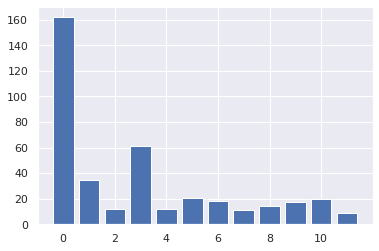

In [ ]:

# perform permutation importance
results = permutation_importance(model, X_train, y_train, scoring='max_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, scoring='max_error').fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
164.8370 ± 18.7483,PS1
59.5312 ± 2.3825,PS5
36.9926 ± 3.8958,PS3
20.8333 ± 0.6511,FS2
18.6690 ± 11.0156,CP1
18.3539 ± 0.6398,TS1
16.2732 ± 1.0483,CE1
15.4882 ± 5.8230,VS1
12.3640 ± 1.8896,PS4
12.2598 ± 3.6399,FS1


#LABEL1 PREDICTION
####Which is also early stability prediction spoecificly for 1hr prior to breakdown
###Failure = 1
###healthy = 0


In [ ]:
df1 = pd.DataFrame(data, columns=['date','PS1','PS3', 'PS4', 'PS5', 'FS1', 'FS2', 'TS1', 'P1', 'VS1', 'CE1', 'CP1', 'SE1', 'label1'])

In [ ]:
df1.head()

,date,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,label1
0,2019-01-01 00:00:00,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183,0
1,2019-01-01 00:10:00,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617,0
2,2019-01-01 00:20:00,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,NaN,1.113217,59.543150,0
3,2019-01-01 00:30:00,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900,0
4,2019-01-01 00:40:00,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267,0


In [ ]:
X=df1[['PS1', 'PS3', 'PS4', 'PS5', 'FS1', 'FS2', 'TS1', 'P1', 'VS1', 'CE1', 'CP1', 'SE1']]
y=df1[['label1']]

In [ ]:
y.value_counts()

label1
1         1545
0          660
dtype: int64

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd 
import pandas as pd 
import numpy as np 
import scipy as sp 
import sklearn
import random 
import time 

from sklearn import preprocessing, model_selection
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
import tensorflow
print(tensorflow.__version__)
from sklearn.metrics import classification_report, confusion_matrix

2.4.1


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, num_classes = 2)
y_test = keras.utils.to_categorical(y_test, num_classes = 2)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (1984, 12)
Number transactions y_train dataset:  (1984, 2)
Number transactions X_test dataset:  (221, 12)
Number transactions y_test dataset:  (221, 2)


In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24,kernel_initializer='he_uniform',activation='relu',input_dim = 12))

classifier.add(Dense(units = 12, kernel_initializer = 'glorot_uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 2, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 26        
Total params: 638
Trainable params: 638
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 16,epochs = 400)

Epoch 1/400
84/84 [==============================] - 1s 4ms/step - loss: 0.6142 - accuracy: 0.6414 - val_loss: 0.6757 - val_accuracy: 0.7008
Epoch 2/400
84/84 [==============================] - 0s 3ms/step - loss: 0.6667 - accuracy: 0.7160 - val_loss: 0.6486 - val_accuracy: 0.7008
Epoch 3/400
84/84 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.7113 - val_loss: 0.6310 - val_accuracy: 0.7008
Epoch 4/400
84/84 [==============================] - 0s 3ms/step - loss: 0.6227 - accuracy: 0.7114 - val_loss: 0.6193 - val_accuracy: 0.7008
Epoch 5/400
84/84 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6966 - val_loss: 0.6139 - val_accuracy: 0.7008
Epoch 6/400
84/84 [==============================] - 0s 3ms/step - loss: 0.6129 - accuracy: 0.7014 - val_loss: 0.6117 - val_accuracy: 0.7008
Epoch 7/400
84/84 [==============================] - 0s 3ms/step - loss: 0.6195 - accuracy: 0.6901 - val_loss: 0.6109 - val_accuracy: 0.7008
Epoch 8/400
8

KeyboardInterrupt: ignored

In [ ]:
score = classifier.evaluate(X_test, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
y_pred = classifier.predict(X_test)

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

In [ ]:
classifier.save('stable.h5')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# predict probabilities for test set
yhat_probs = classifier.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = classifier.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

In [ ]:
df1['label1_pred']=pd.Series(yhat_classes)

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(classifier, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()